In [2]:
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
birds_df = pd.read_csv("birds.csv")
birds_df.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


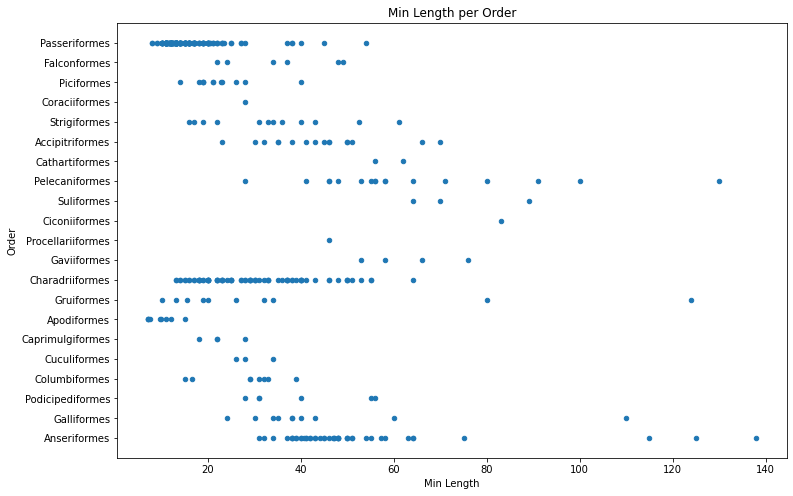

In [15]:
birds_df.plot(kind='scatter',x='MinLength',y='Order',figsize=(12,8))

plt.title('Min Length per Order')
plt.ylabel('Order')
plt.xlabel('Min Length')

plt.show()


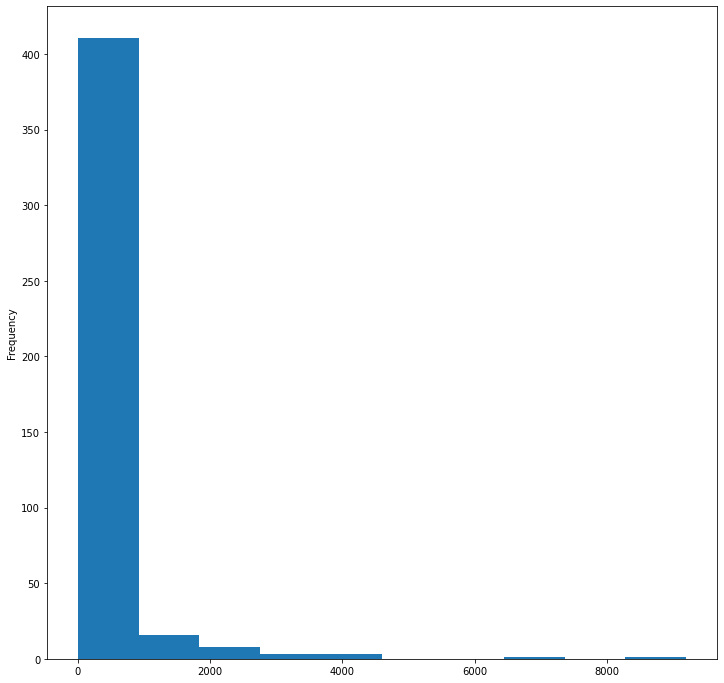

In [16]:
birds_df['MinBodyMass'].plot(kind = 'hist', bins = 10, figsize = (12,12))
plt.show()

400+ birds in this dataset fall in the range of under 1000 for their Min Body Mass.

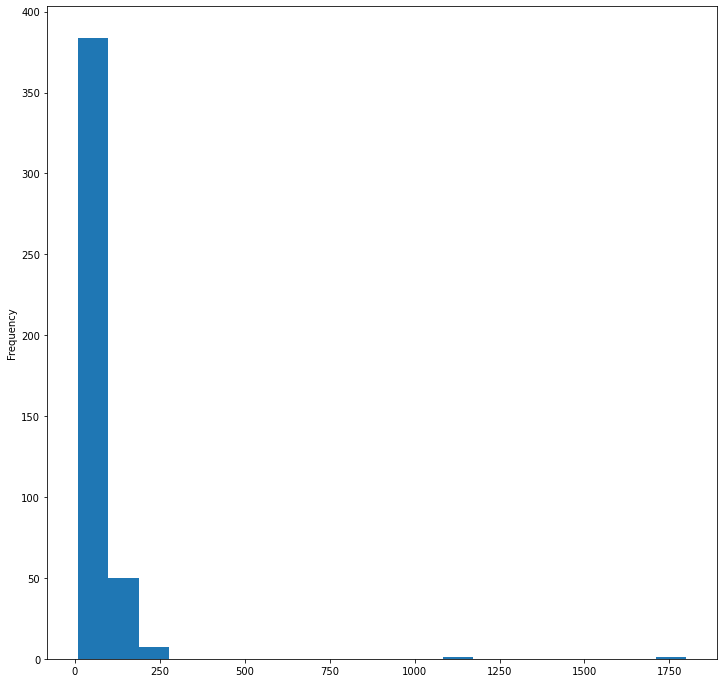

In [17]:
birds_df['MinWingspan'].plot(kind = 'hist', bins = 20, figsize = (12,12))
plt.show()

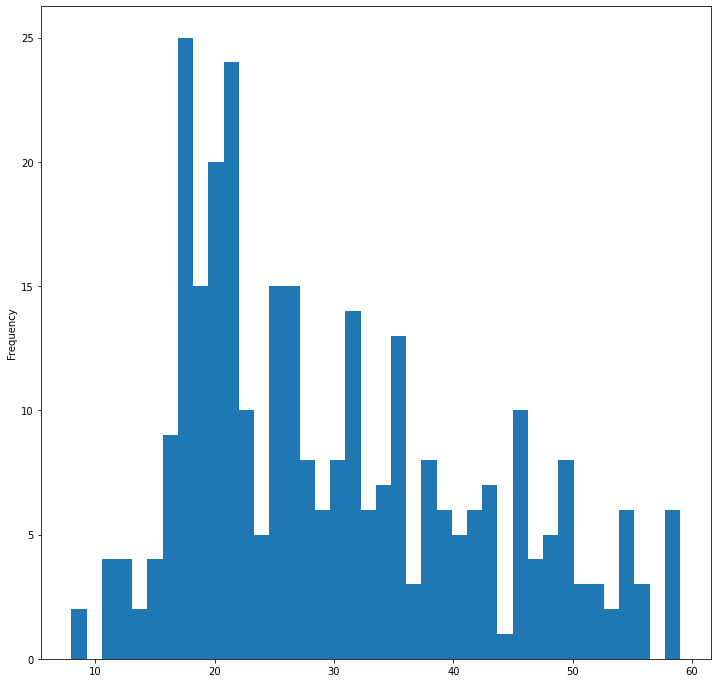

In [19]:
filteredBirds = birds_df[(birds_df['MinWingspan'] > 1) & (birds_df['MinWingspan'] < 60)]      
filteredBirds['MinWingspan'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show() 

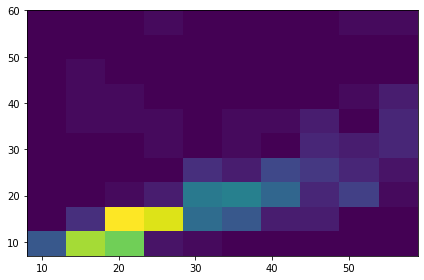

In [20]:
x = filteredBirds['MinWingspan']
y = filteredBirds['MinLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

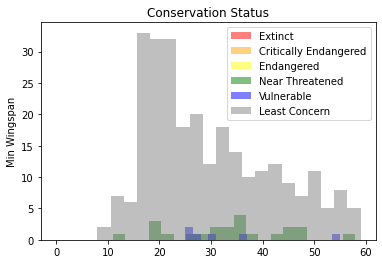

In [24]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend()

There doesn't seem to be a good correlation between minimum wingspan and conservation status.

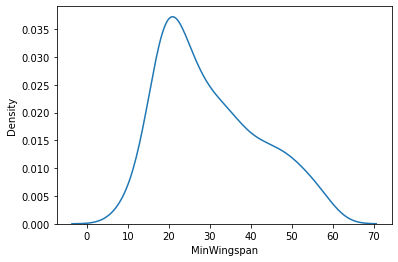

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

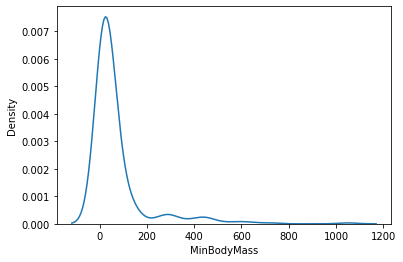

In [29]:
sns.kdeplot(filteredBirds['MinBodyMass'])
plt.show()

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


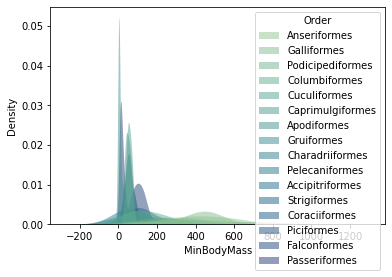

In [34]:
sns.kdeplot(
   data=filteredBirds, x="MinBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


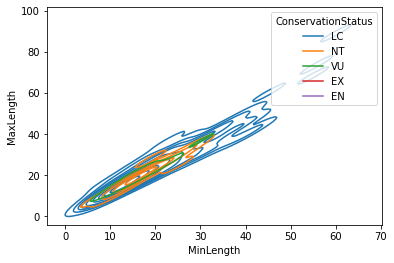

In [36]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")
plt.show()